In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [32]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [33]:
dateparse=lambda dates:pd.datetime.strptime(dates,"%Y-%m")

In [34]:
data=pd.read_csv("AirPassengers.csv",parse_dates=['Month'],index_col='Month',date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [36]:
ts=data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [37]:
#indexing of the ts data
ts['1960-09-01']

508

In [38]:
from datetime import datetime

In [39]:
#second method of indexing of ts
ts[datetime(1949,1,1)]

112

In [40]:
#spcify the entire range
ts['1949-01-10':'1969-07-01']

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 143, dtype: int64

In [41]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [42]:
#data for the whole year
ts['1960']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [43]:
ts['1960-01']

Month
1960-01-01    417
Name: #Passengers, dtype: int64

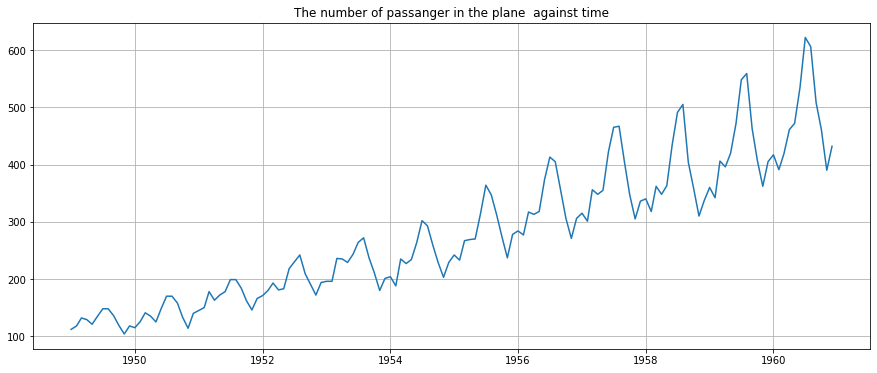

In [45]:
#ploting the data
plt.plot(ts)
plt.title("The number of passanger in the plane  against time")
plt.grid()

It show that the number of air passangers were increaing with time

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
# def test_statinarity(timeseries):
#     #determimg the rolling statistics
#     rolmean=pd.rolling_mean(timeseries,window=12)
#     #plotting the rolling statistis
#     orig=plt.plot(timeseries,color='blue',label='origin')
#     mean=plt.plot(rolmean,color='red',label='Rolling mean')
#     std=plt.plot(rolstd,color='black',label='Rolling std')
#     plt.legend(loc='best')
#     plt.title('Rolling mean  and stadard deviation')
#     plt.show(block=False)
#     print('results of dicky-fuller-test')
#     dtest=adfuller(timeseries,autolog='AIC')
#     dfoutput=pd.series(dtest[0:4],index=['Test Statistics','P_value','#lags used','NUmber of observations used'])
#     for  key,value in dftest[4].item():
        
#         dfoutput['Critical value(%s)'%key]=value
#         print (dfoutput)
#         #running the code
#         test_statinarity(ts)

In [73]:
# test_statinarity(ts)

In [75]:
result = adfuller(ts)
result

(0.8153688792060497,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [77]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


#### So in our case here  we  fail  reject the null hypothesis hence our time series it non-statinary

## how to make time series statinary

In [78]:
ts_log=np.log(ts)

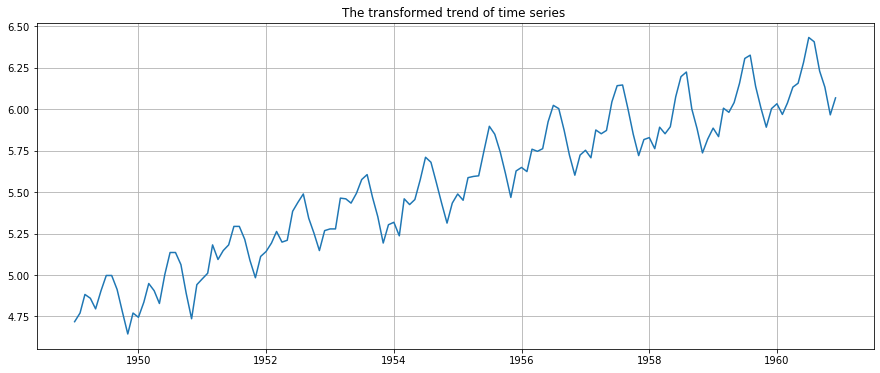

In [81]:
plt.plot(ts_log)
plt.title("The transformed trend of time series ")
plt.grid()

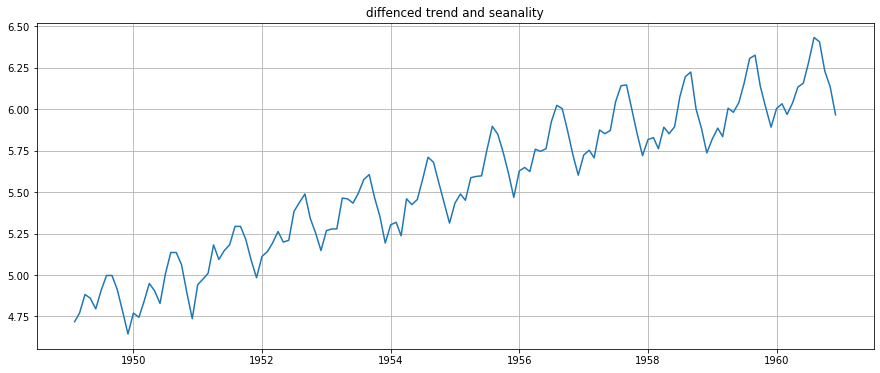

In [84]:
#one method of dealing with  removing trend and seasonality is  differencning
ts_log_diff=ts_log.shift()
plt.plot(ts_log_diff)
plt.title('diffenced trend and seanality')
plt.grid()

In [89]:
#decompoising
from statsmodels.tsa.seasonal import seasonal_decompose

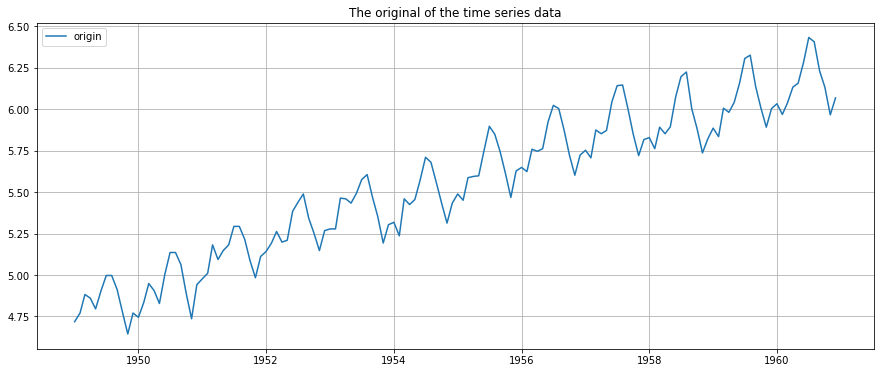

In [103]:
decompostion=seasonal_decompose(ts_log)
trend=decompostion.trend
seaonal=decompostion.seasonal
residueal=decompostion.resid
# plt.subplot(411)
plt.plot(ts_log,label='origin')
plt.legend(loc='best')
plt.title("The original of the time series data")
plt.grid()

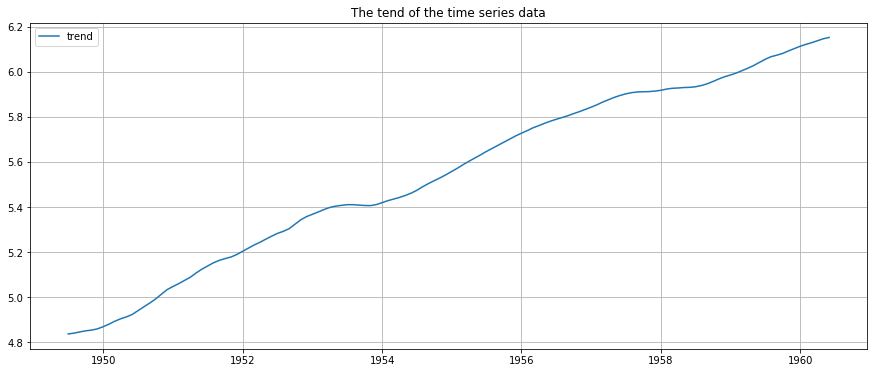

In [102]:
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.title("The tend of the time series data")
plt.grid()

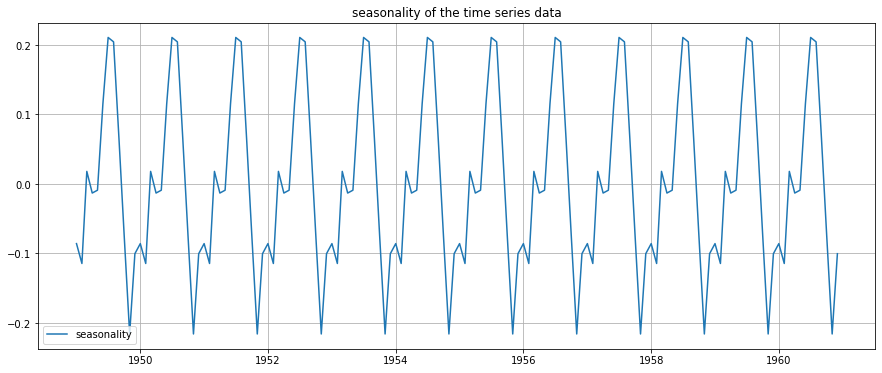

In [114]:
plt.plot(seaonal,label='seasonality')
plt.legend(loc='best')
plt.title("seasonality of the time series data")
plt.grid()

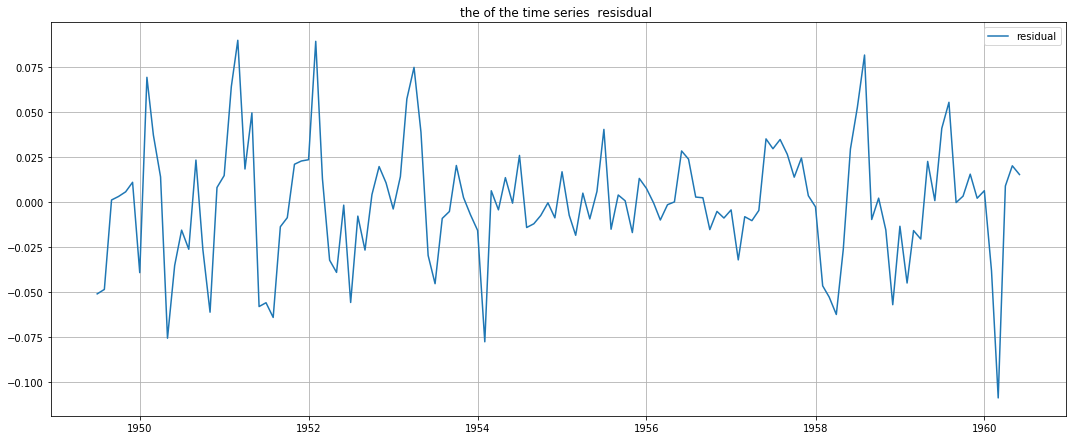

In [110]:
plt.plot(residueal,label='residual')
plt.legend(loc='best')
plt.tight_layout()
plt.title("the of the time series  resisdual ")
plt.grid()

# Forecasting the time series

In [124]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20)


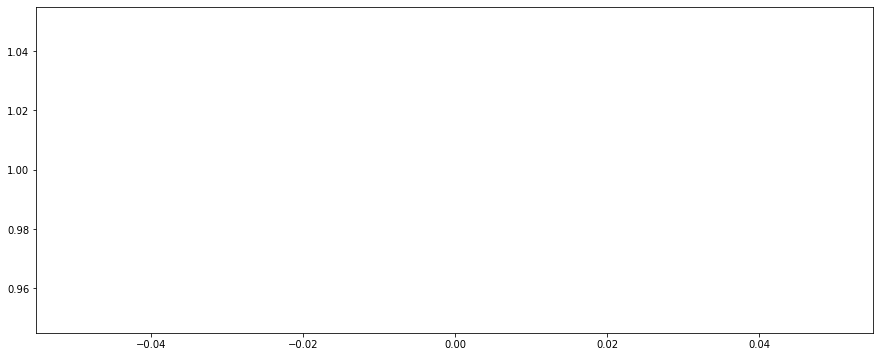

In [126]:
#ploting acf
plt.plot(lag_pacf)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg